In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\youss\OneDrive\Desktop\DataQuest\Projects\Story Telling Data Visualization on Exchange Rate\euro-daily-hist_1999_2022.csv")

In [3]:
data.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2024-04-11,1.6448,1.9558,5.4468,1.4688,0.9787,7.7646,NaN,25.392,7.4604,...,4.9713,NaN,11.531,1.4518,NaN,NaN,39.22,34.6336,1.0729,20.1614
1,2024-04-10,1.6399,1.9558,5.433,1.4728,0.981,7.8548,NaN,25.368,7.4594,...,4.9690,NaN,11.4345,1.4605,NaN,NaN,39.536,35.0329,1.086,20.0851
2,2024-04-09,1.6407,1.9558,5.4489,1.4749,0.9819,7.8603,NaN,25.38,7.459,...,4.9682,NaN,11.4555,1.4623,NaN,NaN,39.529,34.9828,1.0867,20.0861
3,2024-04-08,1.6433,1.9558,5.4806,1.4715,0.9807,7.8282,NaN,25.354,7.4588,...,4.9681,NaN,11.4675,1.4607,NaN,NaN,39.769,34.8481,1.0823,20.1574
4,2024-04-05,1.6461,1.9558,5.4633,1.4702,0.9793,7.8421,NaN,25.286,7.459,...,4.9677,NaN,11.526,1.4608,NaN,NaN,39.743,34.6312,1.0841,20.171


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6535 entries, 0 to 6534
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6535 non-null   object 
 1   [Australian dollar ]      6535 non-null   object 
 2   [Bulgarian lev ]          6133 non-null   object 
 3   [Brazilian real ]         6267 non-null   object 
 4   [Canadian dollar ]        6535 non-null   object 
 5   [Swiss franc ]            6535 non-null   object 
 6   [Chinese yuan renminbi ]  6267 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6535 non-null   object 
 9   [Danish krone ]           6535 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6535 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6535 non-null   object 
 14  [Croatia

In [5]:
data = data[['Period\\Unit:', '[US dollar ]']]

In [6]:
data.head()

,Period\Unit:,[US dollar ]
0,2024-04-11,1.0729
1,2024-04-10,1.086
2,2024-04-09,1.0867
3,2024-04-08,1.0823
4,2024-04-05,1.0841


In [7]:
mapp = {'Period\\Unit:': 'time', '[US dollar ]': 'us_dollar'}
data = data.rename(columns=mapp)

In [8]:
data.head()

,time,us_dollar
0,2024-04-11,1.0729
1,2024-04-10,1.086
2,2024-04-09,1.0867
3,2024-04-08,1.0823
4,2024-04-05,1.0841


In [9]:
data['time'] = pd.to_datetime(data['time'])

In [10]:
data['us_dollar'] = data['us_dollar'].str.replace('-', '0')

In [11]:
data = data[data['us_dollar'] != '0']

In [12]:
data['us_dollar'] = data['us_dollar'].astype(float)

In [13]:
data = data.sort_values('time', ascending=True)

In [14]:
data.head()

,time,us_dollar
6534,1999-01-04,1.1789
6533,1999-01-05,1.1790
6532,1999-01-06,1.1743
6531,1999-01-07,1.1632
6530,1999-01-08,1.1659


## Story Telling Data Visualization

**How did COVID-19 impacted the exchange rate of the Euro to US Dollar**

In [15]:
covid = data[(data['time'] >= '2020-1-1') & (data['time'] < '2021-01-01')].copy()
covid = covid.groupby(covid['time'].dt.to_period('M'))['us_dollar'].mean().reset_index()
covid['time'] = covid['time'].dt.to_timestamp()

In [16]:
covid.head(20)

,time,us_dollar
0,2020-01-01,1.110036
1,2020-02-01,1.090500
2,2020-03-01,1.106341
3,2020-04-01,1.086190
4,2020-05-01,1.090185
5,2020-06-01,1.125459
6,2020-07-01,1.146339
7,2020-08-01,1.182810
8,2020-09-01,1.179241
9,2020-10-01,1.177518


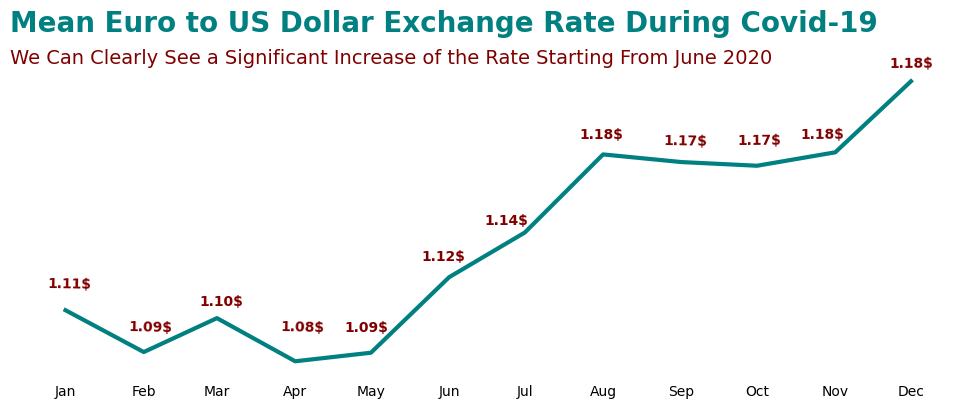

In [26]:
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(covid['time'], covid['us_dollar'], color='#008080', linewidth=3)
for location in ['left','bottom','top','right']:
    ax.spines[location].set_visible(False)
ax.set_xticks(covid['time'])
ax.set_xticklabels(labels)
ax.set_yticklabels([])
ax.tick_params(left=False, bottom=False)
ax.text(18240, 1.24, 'Mean Euro to US Dollar Exchange Rate During Covid-19', weight='bold', size=20, color='#008080')
ax.text(18240, 1.225, 'We Can Clearly See a Significant Increase of the Rate Starting From June 2020', size=14, color='#800000')
ax.text(18255, 1.12, '1.11$', color='#800000', weight='bold', rotation = -1) # Jan
ax.text(18287, 1.1, '1.09$', color='#800000', weight='bold', rotation = -1.5) # Feb
ax.text(18315, 1.112, '1.10$', color='#800000', weight='bold', rotation = 0) # Mar
ax.text(18347, 1.1, '1.08$', color='#800000', weight='bold', rotation = -1.5) # Apr
ax.text(18372.5, 1.1, '1.09$', color='#800000', weight='bold', rotation = 0) # May
ax.text(18403, 1.133, '1.12$', color='#800000', weight='bold', rotation = 0) # Jun
ax.text(18428, 1.15, '1.14$', color='#800000', weight='bold', rotation = 0) # Jul
ax.text(18465.5, 1.19, '1.18$', color='#800000', weight='bold', rotation = 0) # Aug
ax.text(18499, 1.187, '1.17$', color='#800000', weight='bold', rotation = -1) # Sep
ax.text(18528, 1.187, '1.17$', color='#800000', weight='bold', rotation = 0.5) # Oct
ax.text(18553, 1.19, '1.18$', color='#800000', weight='bold', rotation = 0.5) # Nov
ax.text(18588.5, 1.223, '1.18$', color='#800000', weight='bold', rotation = 0.5) # Dec
plt.show()